# Dependencies

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read Data

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Part 1 - Create PyBer Summary DataFrame

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [5]:
# Get the number of rides for all city types.
ride_counts = pyber_data_df.groupby(["type"]).count()["ride_id"]

# Get the number of drivers for all city types.
driver_counts = city_data_df.groupby(["type"]).sum()["driver_count"]

# Total Fares
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

# Average Fares
average_fares_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fares_driver = total_fares / driver_counts

In [6]:
# Combine each Series for average math scores by school into single DataFrame.
data = {'City Type':['Rural', 'Suburban', 'Urban'], 'Total Rides':ride_counts,
       'Total Drivers':driver_counts, 'Total Fares':total_fares, 
        'Average Fare per Ride':average_fares_ride,
       'Average Fare per Driver':average_fares_driver} 
summary_df = pd.DataFrame(data)
summary_df = summary_df.set_index(["City Type"])
summary_df.index.name = None 

# Format improvement
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)    
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)    
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)  
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Part 2 - Create a Multiple-Line Plot for the Sum of the Fares for City Types

In [7]:
# 1) Rename columns. Creating duplicate dataframe to prevent Part 1 from breaking from running out of order.
part2A_pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
# 2) Set Index to Date
part2A_pyber_data_df = part2A_pyber_data_df.set_index(["Date"])
# 3) Copy
part2B_pyber_data_df = part2A_pyber_data_df[['City Type','Fare']]
# 4) Drop Date - not sure what this is
# None
# 5) 6) Set Index to datetime type and check.
part2B_pyber_data_df.info()
part2B_pyber_data_df.index = pd.to_datetime(part2B_pyber_data_df.index)
part2B_pyber_data_df.info()
# 7) Calculate fare sums of all city types
city_fare_sums = part2B_pyber_data_df.groupby(["City Type"]).sum()["Fare"]
# 8) Reset Index
part2B_pyber_data_df.reset_index()
# 9) Create pivot table DataFrame
pivot_table = pd.pivot_table(part2B_pyber_data_df, values='Fare', index=['Date'],
                    columns=['City Type'], aggfunc=np.sum) # fill_value=0 can set NaN to zero, but we won't)
# 10) Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .
pivot_table = pivot_table.loc['2019-01-01':'2019-04-28']
#pivot_table
# 11) Create a new DataFrame by setting the DataFrame you created in Step 11(?) with resample()
#     in weekly bins, and calculate the sum() of the fares for each week.
weekly_df = pivot_table.resample('W-Mon').sum()
#weekly_df.plot()


<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


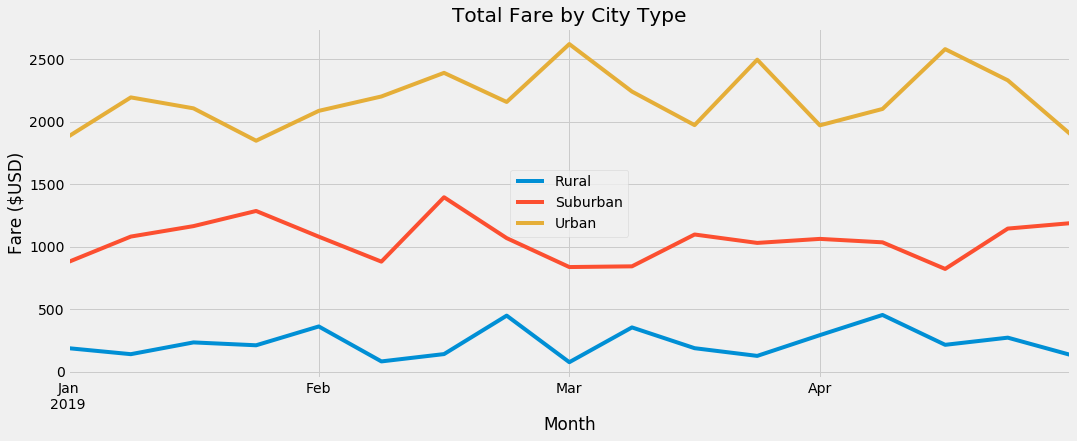

In [8]:
# 12) Plot
plt.style.use('fivethirtyeight')
ax = weekly_df.plot(figsize=(16,6))
ax.set_title("Total Fare by City Type")
ax.legend(loc='center')
ax.set_xlabel('Month')
ax.set_ylabel('Fare ($USD)')
plt.savefig("Analysis/result.png")